# **Cargar librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import add_dummy_feature
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# **Cargar datos**

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

# Descargar dataset

nombres_columnas = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",	"length", "width", "height", "curb_weight", "engine_type", "num_cylinders","engine_size", "fuel_system", "bore", "stroke", "compression_ratio","horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

# Cargar dataset con nombres de columnas
df = pd.read_csv(url, names=nombres_columnas, na_values="?")  # "?" indica valores faltantes
# df = pd.read_csv('imports-85.data')
df.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# **1. Análisis Exploratorio de Datos (Exploratory Data Analisys)**

## Información general del dataset.

In [3]:
df.info()
df.describe(include="all")
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

## Estadísticas descriptivas.

In [4]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Distribución de variables númericas.

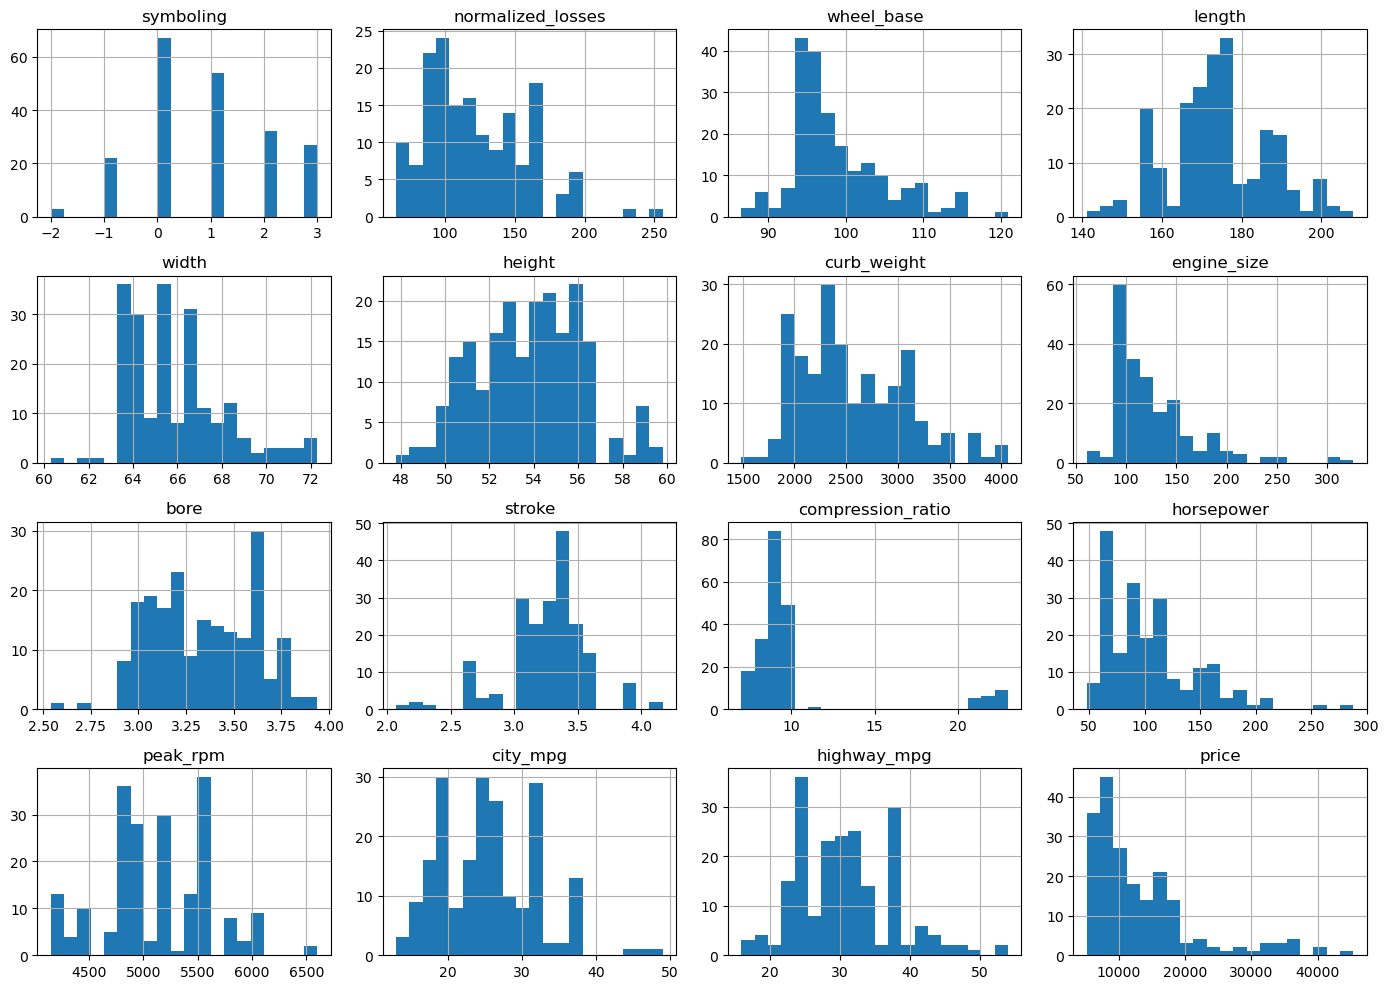

In [5]:
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

## Outliders mediante boxplots

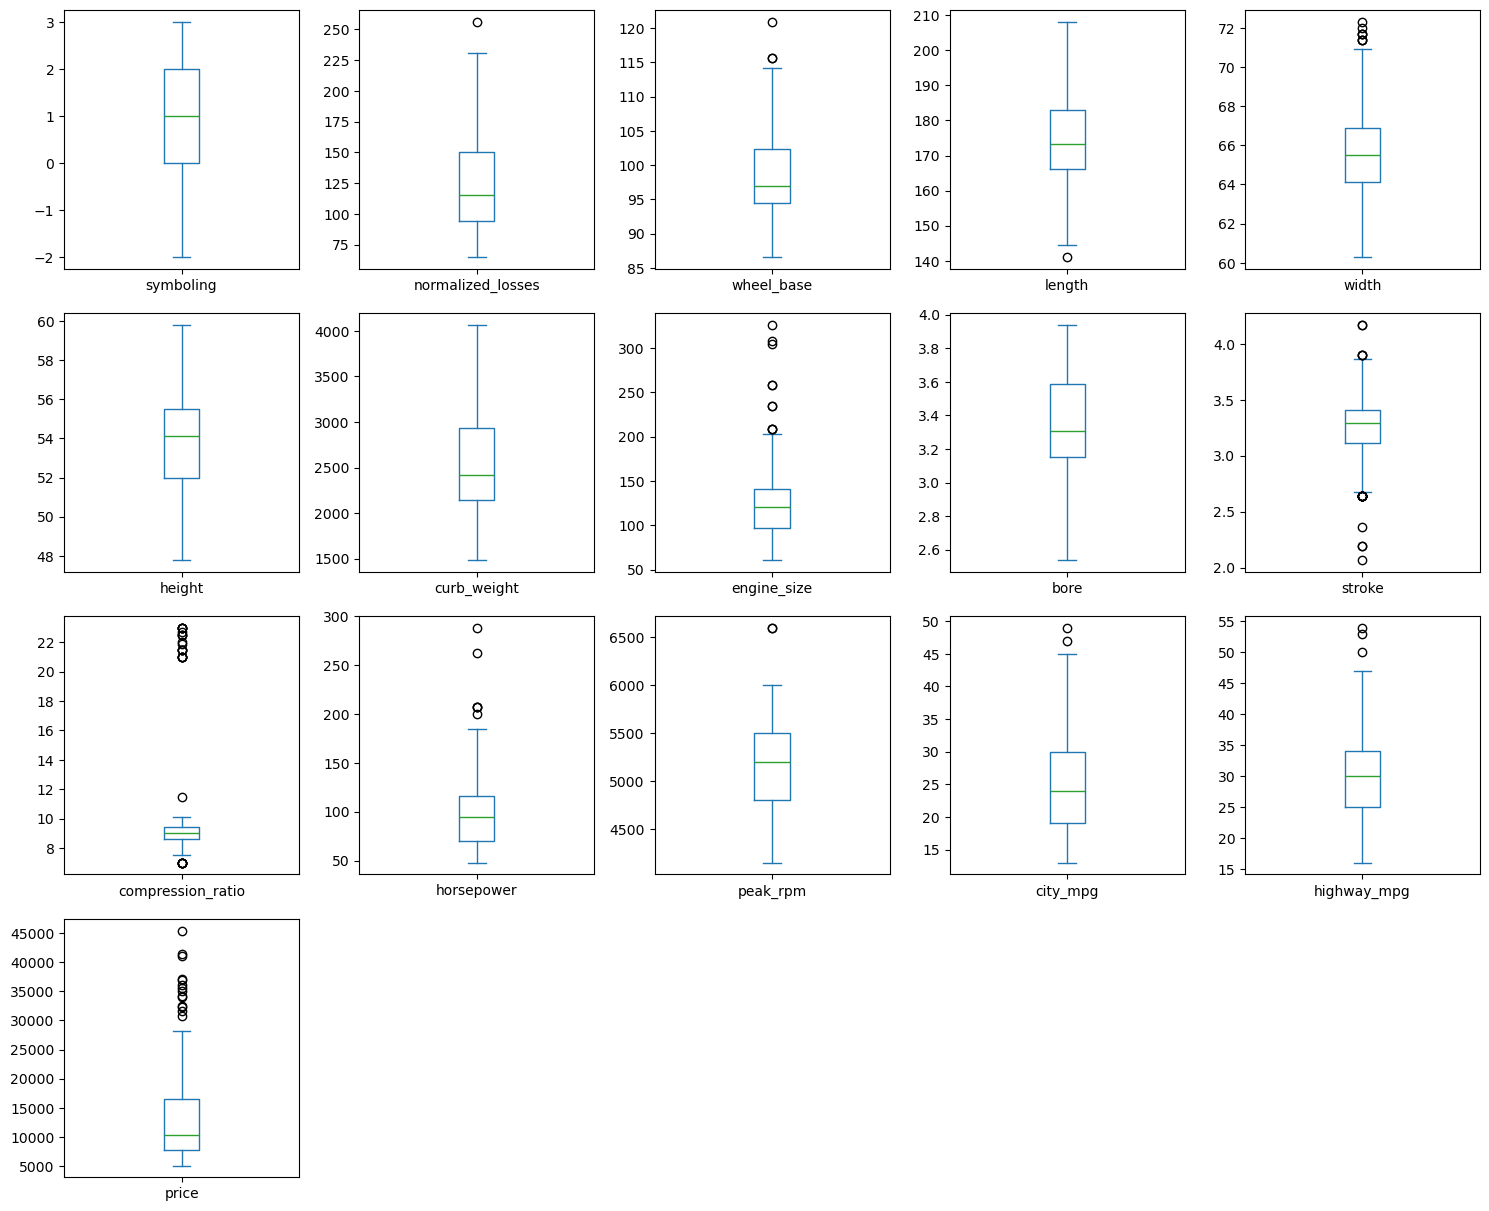

In [6]:
columnas_numericas = df.select_dtypes(include="number").columns

df[columnas_numericas].plot(kind="box", subplots=True, layout=(5,5), figsize=(15, 15))
plt.tight_layout()
plt.show()

## Correlaciones

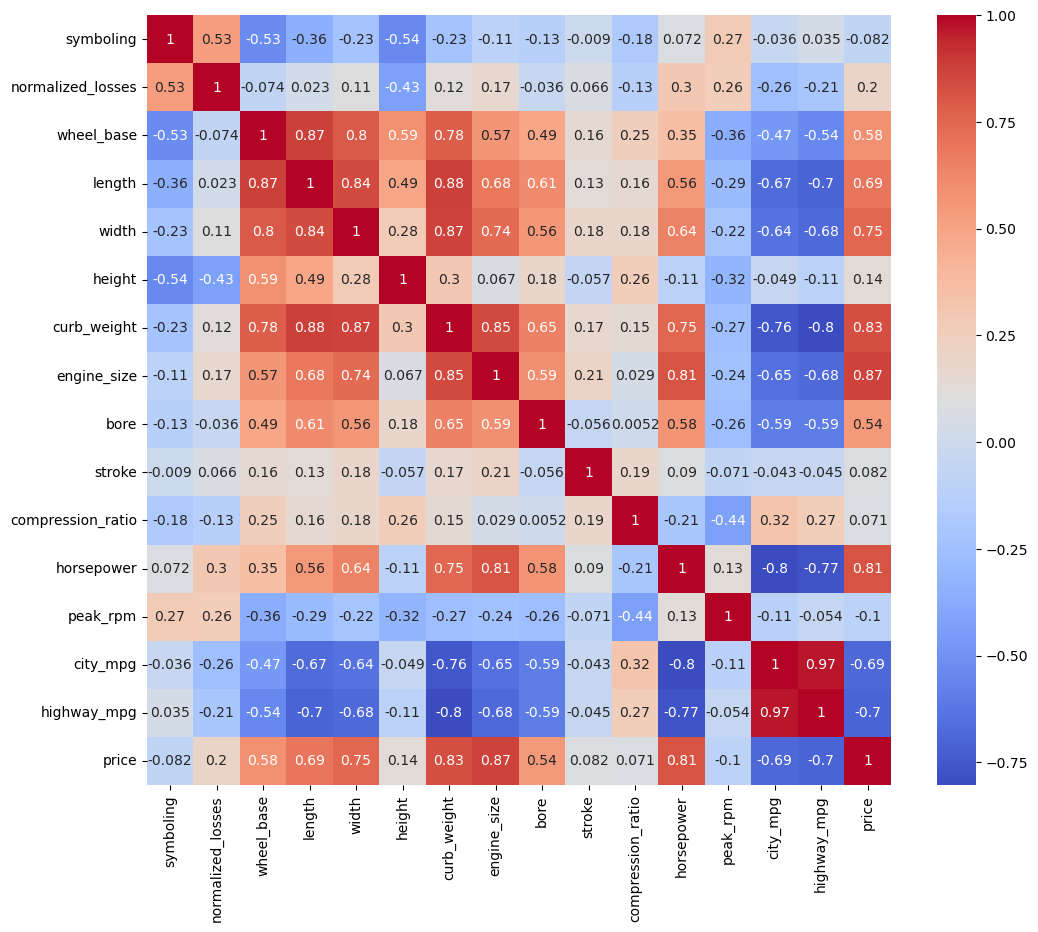

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

# **2. Preprocesamiento de datos**

## 2.1 Manejo de valores nulos.

In [8]:
# Datos númericos
# df.fillna(df.mean(numeric_only=True), inplace=True)

# Rellenar valores faltantes solo en columnas distintas de 'price'
cols_a_rellenar = df.columns.difference(['price'])

df[cols_a_rellenar] = df[cols_a_rellenar].fillna(df[cols_a_rellenar].mean(numeric_only=True))

# Datos categóricos

columnas_categoricas = df.select_dtypes(include="object").columns

for col in columnas_categoricas:
    df[col] = df[col].fillna("Unknown")

df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                4
dtype: int64

## 2.2 Conversión de variables categóricas en numéricas mediante one-hot encoding.

In [9]:
columnas_categoricas = df.select_dtypes(include="object").columns

df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

df_codificado.head()
print(df_codificado.shape)

(205, 67)



## 2.3 Estandarización (normalización) de variables numéricas.

In [10]:

# Seleccionamos columnas numéricas continuas originales (antes del one-hot)
num_cols = df.select_dtypes(include="number").columns

num_cols = [c for c in num_cols if c != "price"]  # NO normalizamos el precio

print(num_cols)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
df_codificado[num_cols] = scaler.fit_transform(df_codificado[num_cols])

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


## 2.4 Eliminación de valores atípicos.

In [11]:
# Columnas numéricas continuas originales (antes del one-hot)
num_continuas = ['symboling', 'normalized_losses', 'wheel_base','length','width',
                 'height','curb_weight','engine_size','bore','stroke',
                 'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg']

# Crear una copia para no modificar df_codificado inmediatamente
df_clean = df_codificado.copy()

# Filtrar outliers ±3 desviaciones estándar en columnas continuas
for col in num_continuas:
    df_clean = df_clean[(df_clean[col] <= 3) & (df_clean[col] >= -3)]

print(f"Filas originales: {df_codificado.shape[0]}")
print(f"Filas después de limitar outliers (capping): {df_clean.shape[0]}")

# z_scores = np.abs(df_clean[num_continuas])
# plt.figure(figsize=(12,6))
# sns.heatmap(z_scores, cmap="coolwarm", cbar_kws={'label': 'Z-score'})
# plt.title("Z-scores de variables continuas")
# plt.show()

Filas originales: 205
Filas después de limitar outliers (capping): 180


In [12]:
# Bloque de código para leer los datos de mejor forma

# Guardar df_clean en un archivo CSV
df_clean.to_csv("df_clean.csv", index=False)

# **3. Entrenamiento de modelos.**

## 3.1 Formula matemática del algoritmo de regresión lineal

Método reutilizable para entrenar modelos.

In [13]:
def entrenar_regresion_lineal(df, target='price', tratamiento='ninguno', test_size=0.2, random_state=42):
    df_proc = df.copy()

    # Tratamiento de ceros/NaN en la variable objetivo
    if tratamiento == 'eliminar':
        df_proc = df_proc[df_proc[target] > 0]
    elif tratamiento == 'rellenar':
        media = df_proc.loc[df_proc[target] > 0, target].mean()
        df_proc[target] = df_proc[target].replace(0, np.nan).fillna(media)

    # Variables independientes
    X_initial = df_proc.drop(columns=[target])
    zero_var_cols = X_initial.columns[X_initial.var() == 0]
    X_procesadas = X_initial.drop(columns=zero_var_cols)
    columnas_entrenamiento = X_procesadas.columns

    X = X_procesadas.values.astype(np.float64)
    y_log = np.log(df_proc[target].values.reshape(-1,1).astype(np.float64))

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_log, test_size=test_size, random_state=random_state
    )

    # Normalización de columnas numéricas
    num_cols_train = [col for col in num_cols if col in columnas_entrenamiento]
    num_indices = [list(columnas_entrenamiento).index(c) for c in num_cols_train]

    scaler = StandardScaler()
    X_train[:, num_indices] = scaler.fit_transform(X_train[:, num_indices])
    X_test[:, num_indices] = scaler.transform(X_test[:, num_indices])

    # Añadir columna de unos
    X_train_b = add_dummy_feature(X_train)
    X_test_b = add_dummy_feature(X_test)

    # Entrenamiento con pseudo-inversa
    theta_best = np.linalg.pinv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

    return theta_best, X_test_b, y_test, columnas_entrenamiento


## 3.2 Regresión Lineal Múltiple.

### Pruebas de ambos modelos

### Eliminando registros.

In [14]:
# --- Entrenar modelo eliminando ceros/NaN ---
theta_eliminar, X_test_b_elim, y_test_elim, cols_elim = entrenar_regresion_lineal(
    df_clean,
    target='price',
    tratamiento='eliminar',
    test_size=0.2,
    random_state=42
)

# --- Predicción para el primer registro de prueba de cada modelo ---
# Modelo eliminando ceros/NaN
X_muestra = X_test_b_elim[0].reshape(1, -1)
y_actual_log = y_test_elim[0]
y_pred_log = X_muestra @ theta_eliminar
y_pred = np.exp(y_pred_log[0][0])
y_actual = np.exp(y_actual_log[0])
print("Modelo eliminando ceros/NaN")
print(f"Precio predicho: {y_pred:.2f}")
print(f"Precio real: {y_actual:.2f}")
print(f"Diferencia: {abs(y_pred - y_actual):.2f}\n")


Modelo eliminando ceros/NaN
Precio predicho: 5027.27
Precio real: 5572.00
Diferencia: 544.73



#### Modificando registros.

In [15]:
theta_modificar, X_test_b_mod, y_test_mod, cols_mod = entrenar_regresion_lineal(
    df_clean,
    target='price',
    tratamiento='rellenar',
    test_size=0.2,
    random_state=42
)


X_muestra = X_test_b_mod[0].reshape(1, -1)
y_actual_log = y_test_mod[0]
y_pred_log = X_muestra @ theta_modificar
y_pred = np.exp(y_pred_log[0][0])
y_actual = np.exp(y_actual_log[0])
print("Modelo rellenando ceros/NaN")
print(f"Precio predicho: {y_pred:.2f}")
print(f"Precio real: {y_actual:.2f}")
print(f"Diferencia: {abs(y_pred - y_actual):.2f}")


Modelo rellenando ceros/NaN
Precio predicho: 13516.77
Precio real: 6575.00
Diferencia: 6941.77


## Comparativa

In [16]:
# --- Función para evaluar métricas ---
def evaluar_modelo(theta, X_test_b, y_test):
    y_pred_log = X_test_b @ theta
    y_pred = np.exp(y_pred_log)
    y_actual = np.exp(y_test)

    rmse = np.sqrt(np.mean((y_pred - y_actual)**2))
    ss_res = np.sum((y_actual - y_pred)**2)
    ss_tot = np.sum((y_actual - np.mean(y_actual))**2)
    r2 = 1 - ss_res / ss_tot

    return rmse, r2

# --- Evaluar modelos ---
rmse_elim, r2_elim = evaluar_modelo(theta_eliminar, X_test_b_elim, y_test_elim)
rmse_mod, r2_mod = evaluar_modelo(theta_modificar, X_test_b_mod, y_test_mod)

# --- Crear DataFrame comparativo ---
tabla_comparativa = pd.DataFrame({
    "Modelo": ["Eliminar ceros/NaN", "Rellenar ceros/NaN"],
    "RMSE": [rmse_elim, rmse_mod],
    "R²": [r2_elim, r2_mod]
})

# Opcional: formatear números
tabla_comparativa["RMSE"] = tabla_comparativa["RMSE"].map(lambda x: f"{x:.2f}")
tabla_comparativa["R²"] = tabla_comparativa["R²"].map(lambda x: f"{x:.4f}")

# Mostrar tabla
print(tabla_comparativa)


               Modelo     RMSE      R²
0  Eliminar ceros/NaN  3313.70  0.8829
1  Rellenar ceros/NaN  4359.77  0.7242


# Prueba de Modeos

In [17]:
def entrenar_regresion_sklearn(df, target='price', test_size=0.2, random_state=42):
    # Separar features y target
    X = df.drop(columns=[target])
    zero_var_cols = X.columns[X.var() == 0]
    X = X.drop(columns=zero_var_cols)
    columns_used = X.columns

    # Variable objetivo log-transformada
    y_log = np.log(df[target].values.reshape(-1,1).astype(np.float64))

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X.values.astype(np.float64), y_log, test_size=test_size, random_state=random_state
    )

    # Escalar variables numéricas
    num_cols_train = [c for c in num_cols if c in columns_used]
    num_indices = [list(columns_used).index(c) for c in num_cols_train]
    scaler = StandardScaler()
    X_train[:, num_indices] = scaler.fit_transform(X_train[:, num_indices])
    X_test[:, num_indices] = scaler.transform(X_test[:, num_indices])

    # Entrenar modelo scikit-learn (sin añadir columna de unos, fit_intercept=True)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Reconstruir theta con formato igual a manual (intercept + coef)
    theta = np.vstack([linreg.intercept_.reshape(-1,1), linreg.coef_.T])

    # Añadir columna de unos a X_test para evaluación (igual que en manual)
    X_test_b = add_dummy_feature(X_test)

    return theta, X_test_b, y_test, columns_used


In [18]:
# Dataset eliminando ceros/NaN
df_elim = df_clean[df_clean['price'] > 0].copy()

# Dataset rellenando ceros/NaN con la media
df_mod = df_clean.copy()
precio_medio = df_mod.loc[df_mod['price'] > 0, 'price'].mean()
df_mod['price'] = df_mod['price'].replace(0, np.nan).fillna(precio_medio)

# Modelo eliminar ceros/NaN
theta_manual_elim, X_test_b_elim, y_test_elim, cols_elim = entrenar_regresion_lineal(df_elim, target='price', tratamiento='eliminar')
theta_skl_elim, X_test_b_elim_skl, y_test_elim_skl, cols_elim_skl = entrenar_regresion_sklearn(df_elim, target='price')

# Modelo rellenar ceros/NaN
theta_manual_mod, X_test_b_mod, y_test_mod, cols_mod = entrenar_regresion_lineal(df_mod, target='price', tratamiento='rellenar')
theta_skl_mod, X_test_b_mod_skl, y_test_mod_skl, cols_mod_skl = entrenar_regresion_sklearn(df_mod, target='price')

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Comparación eliminar ceros/NaN
# Predicciones manual
y_pred_manual_log_elim = X_test_b_elim @ theta_manual_elim
y_pred_manual_elim = np.exp(y_pred_manual_log_elim)
y_actual_elim = np.exp(y_test_elim)

rmse_manual_elim = np.sqrt(mean_squared_error(y_actual_elim, y_pred_manual_elim))
r2_manual_elim = r2_score(y_actual_elim, y_pred_manual_elim)

# Predicciones scikit
y_pred_skl_log_elim = X_test_b_elim_skl @ theta_skl_elim
y_pred_skl_elim = np.exp(y_pred_skl_log_elim)
y_actual_elim_skl = np.exp(y_test_elim_skl)

rmse_skl_elim = np.sqrt(mean_squared_error(y_actual_elim_skl, y_pred_skl_elim))
r2_skl_elim = r2_score(y_actual_elim_skl, y_pred_skl_elim)

# --- Comparación rellenar ceros/NaN ---
# Predicciones manual
y_pred_manual_log_mod = X_test_b_mod @ theta_manual_mod
y_pred_manual_mod = np.exp(y_pred_manual_log_mod)
y_actual_mod = np.exp(y_test_mod)

rmse_manual_mod = np.sqrt(mean_squared_error(y_actual_mod, y_pred_manual_mod))
r2_manual_mod = r2_score(y_actual_mod, y_pred_manual_mod)

# Predicciones scikit
y_pred_skl_log_mod = X_test_b_mod_skl @ theta_skl_mod
y_pred_skl_mod = np.exp(y_pred_skl_log_mod)
y_actual_mod_skl = np.exp(y_test_mod_skl)

rmse_skl_mod = np.sqrt(mean_squared_error(y_actual_mod_skl, y_pred_skl_mod))
r2_skl_mod = r2_score(y_actual_mod_skl, y_pred_skl_mod)

resultados = {
    "Modelo": ["Eliminar ceros/NaN", "Eliminar ceros/NaN", "Rellenar ceros/NaN", "Rellenar ceros/NaN"],
    "Método": ["Manual", "Scikit", "Manual", "Scikit"],
    "RMSE": [rmse_manual_elim, rmse_skl_elim, rmse_manual_mod, rmse_skl_mod],
    "R²": [r2_manual_elim, r2_skl_elim, r2_manual_mod, r2_skl_mod]
}

df_resultados = pd.DataFrame(resultados)
print(df_resultados)

               Modelo  Método         RMSE        R²
0  Eliminar ceros/NaN  Manual  3313.697147  0.882943
1  Eliminar ceros/NaN  Scikit  3313.697147  0.882943
2  Rellenar ceros/NaN  Manual  4359.766055  0.724158
3  Rellenar ceros/NaN  Scikit  4359.766055  0.724158
